In [0]:
import time
import math 

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
from sklearn.metrics import confusion_matrix, classification_report

import librosa

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2

import pickle

In [0]:
import matplotlib.pyplot as plt

def plot(history):
# Plot training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [0]:
def eval_metrics(model, X_test, y_test, class_names):

  y_pred = model.predict(X_test)

  y_test = np.argmax(y_test, axis=1)
  y_pred = np.argmax(y_pred, axis=1)
  print('Confusion matrix:', confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred, target_names=class_names))

In [0]:
def sample_data(spects, labels, k):
  
  labels = np.argmax(labels, axis=1)

  # Sample k elements from each class
  spects_sampled = []
  labels_sampled = []
  np.random.seed(0)
  unique_labels = np.unique(labels)

  for label in unique_labels:
    idxs = np.squeeze(np.argwhere(labels == label))
    # Is k bigger than class size?
    kk=k
    if k > len(idxs):
      kk =  len(idxs)
    idxs = np.random.choice(idxs, size=kk)

    spects_sampled.append(spects[idxs])
    ohe = np.zeros(shape=(len(unique_labels)))
    ohe[label] = 1
    labels_sampled.append([ohe for i in range(kk)])

  spects_sampled = np.concatenate(spects_sampled, axis=0)
  labels_sampled = np.concatenate(labels_sampled, axis=0)

  # Shuffle
  p = np.random.permutation(len(labels_sampled))
  labels_sampled, spects_sampled = labels_sampled[p], spects_sampled[p]

  return labels_sampled, spects_sampled

In [0]:
def reshape(spects, dr_method, percentage, reshape_method, labels):

  def exec_dimreduction(matrix, method, n_components):
    if method == 1:
      pca = PCA(n_components=n_components, whiten=False)
      result = pca.fit_transform(matrix)
    elif method == 2:
      isomap = Isomap(n_components=n_components)
      result = isomap.fit_transform(matrix)
    return result


  # Method of application 1: flatten to 2D, apply to whole set
  if reshape_method == 1:
    
    flattened = spects.reshape(len(spects), -1)
    nr_new_dims = int(percentage * flattened.shape[1])

    if dr_method > 0:
      flattened = exec_dimreduction(flattened, dr_method, nr_new_dims)


  elif reshape_method == 2:

    nr_new_dims = int(percentage * spects.shape[1])

    means = np.mean(spects, axis=2)
    stds = np.std(spects, axis=2)
    flattened = np.hstack([means, stds])
    
    if dr_method > 0:
      flattened = exec_dimreduction(flattened, dr_method, nr_new_dims)

  return flattened

In [0]:
def model1(input_shape):

  model = Sequential()
  model.add(Dense(512, activation='relu', input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(Dense(256, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(64, activation='relu'))
  model.add(BatchNormalization())

  return model

In [0]:
def model2(input_shape, n_classes):

  model = Sequential()
  model.add(Dense(150, kernel_regularizer=keras.regularizers.l2(), input_shape=input_shape))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(64, kernel_regularizer=keras.regularizers.l2()))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(32, kernel_regularizer=keras.regularizers.l2()))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  model.add(Dense(n_classes, activation='softmax'))

  return model

---------------------------
Classes: 5
Feature extr method: feat6
Dimensionality reduction: None
Leaving % percentage of components: 0.3
Spectrogram array shape: (10622, 6, 44)
Dim reduced array shape: (10622, 264)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 150)               39750     
_________________________________________________________________
activation_4 (Activation)    (None, 150)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 150)               600       
_________________________________________________________________
dropout_4 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                9664      
_____________________________________

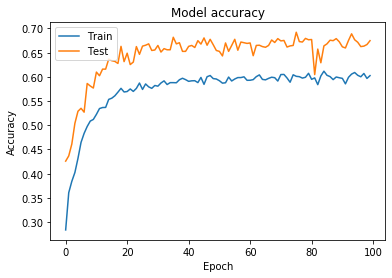

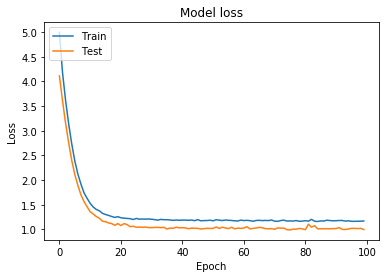

2125/2125 [==============================] - 0s 34us/step
Test loss: 0.998290849236881
Test accuracy: 0.6748235294959124
---------------------------
Classes: 5
Feature extr method: mfcc30
Dimensionality reduction: None
Leaving % percentage of components: 0.3
Spectrogram array shape: (10622, 30, 44)
Dim reduced array shape: (10622, 1320)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 150)               198150    
_________________________________________________________________
activation_7 (Activation)    (None, 150)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 150)               600       
_________________________________________________________________
dropout_7 (Dropout)          (None, 150)               0         
_____________________________________________

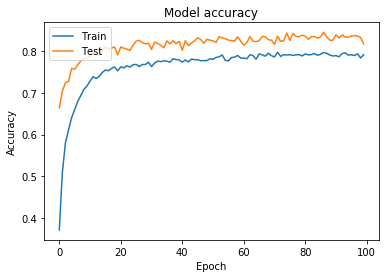

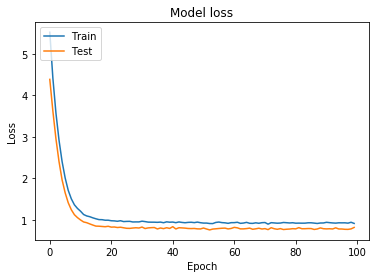

2125/2125 [==============================] - 0s 58us/step
Test loss: 0.8223970019957598
Test accuracy: 0.816941176554736
---------------------------
Classes: 5
Feature extr method: mfcc13
Dimensionality reduction: None
Leaving % percentage of components: 0.3
Spectrogram array shape: (10622, 13, 44)
Dim reduced array shape: (10622, 572)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 150)               85950     
_________________________________________________________________
activation_10 (Activation)   (None, 150)               0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 150)               600       
_________________________________________________________________
dropout_10 (Dropout)         (None, 150)               0         
______________________________________________

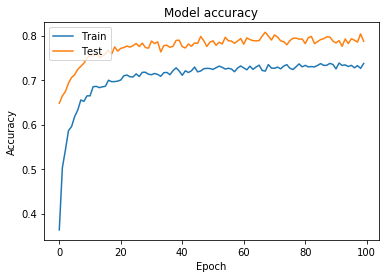

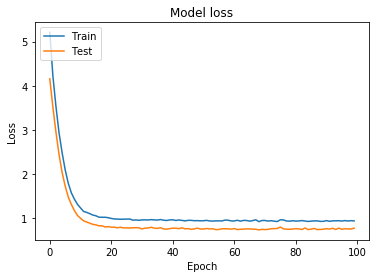

2125/2125 [==============================] - 0s 39us/step
Test loss: 0.7752864025901346
Test accuracy: 0.7872941177031573
---------------------------
Classes: 5
Feature extr method: mel13
Dimensionality reduction: None
Leaving % percentage of components: 0.3
Spectrogram array shape: (10622, 13, 44)
Dim reduced array shape: (10622, 572)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 150)               85950     
_________________________________________________________________
activation_13 (Activation)   (None, 150)               0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 150)               600       
_________________________________________________________________
dropout_13 (Dropout)         (None, 150)               0         
______________________________________________

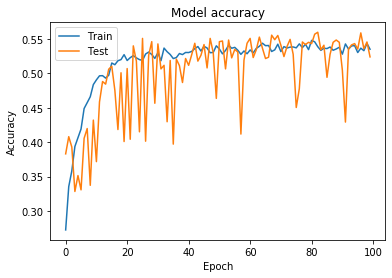

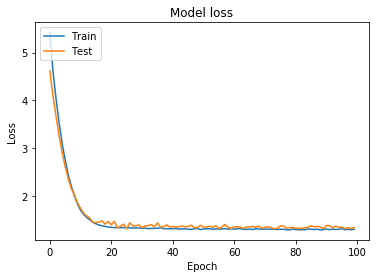

2125/2125 [==============================] - 0s 40us/step
Test loss: 1.3396195291070376
Test accuracy: 0.5237647059945499
---------------------------
Classes: 5
Feature extr method: log_stft13
Dimensionality reduction: None
Leaving % percentage of components: 0.3
Spectrogram array shape: (10622, 14, 44)
Dim reduced array shape: (10622, 616)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 150)               92550     
_________________________________________________________________
activation_16 (Activation)   (None, 150)               0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 150)               600       
_________________________________________________________________
dropout_16 (Dropout)         (None, 150)               0         
_________________________________________

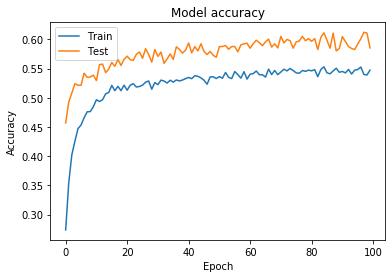

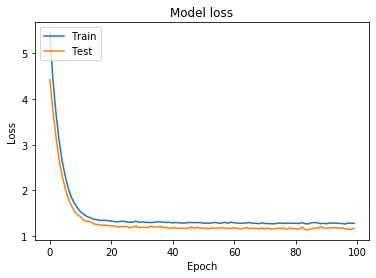

2125/2125 [==============================] - 0s 42us/step
Test loss: 1.1628310830733355
Test accuracy: 0.5854117648461286


In [0]:
url = 'drive/My Drive/Diplomamunka/training data/'
n_classes = 5
tf_methods = ['feat6', 'mfcc30', 'mfcc13', 'mel13', 'log_stft13']
datasets = ['urbansound', 'urbanacoustic']

dimred_methods = ['None', 'PCA', 'Isomap']
reshape_method = 1



# Grid search
for tf_method in tf_methods:
  for dr_method in range(0, len(dimred_methods)-2):
    for perc_comp in np.arange(0.3, 0.7, 0.2):

      if dr_method==0 and perc_comp > 0.31:
        continue
        
      # Load data
      spects_ = np.load(url+'spectrograms_'+datasets[0]+'_'+str(n_classes)+'_'+tf_method+'.npy')
      labels = np.load(url+'labels_'+datasets[0]+'_'+str(n_classes)+'.npy')

      labels, spects_ = sample_data(spects_, labels, 2500)
      spects = spects_

      print('---------------------------')
      print('Classes:', n_classes)
      print('Feature extr method:', tf_method)
      print('Dimensionality reduction:', dimred_methods[dr_method])
      print('Leaving % percentage of components:', perc_comp)
      print("Spectrogram array shape:", spects.shape)

      # Reshaping, dim reduction
      flattened_red = reshape(spects, dr_method, perc_comp, 
                              reshape_method, labels)

      # Scaling
      scaler = StandardScaler()
      flattened_red = scaler.fit_transform(flattened_red)

      print("Dim reduced array shape:", flattened_red.shape)


      # Split data
      X_train, X_test, y_train, y_test = train_test_split(flattened_red, labels, 
                                                          test_size=0.2, random_state=17, shuffle=True)
      # Create model 
      model = model2(X_train[0].shape, n_classes)

      loss = keras.losses.categorical_crossentropy
      n_epochs = 100

      #optimizer = keras.optimizers.Adadelta(lr=0.0005)
      optimizer = keras.optimizers.Adam(lr=0.0005)
      model.compile(loss=loss,
                    optimizer=optimizer,
                    metrics=['accuracy'])
      print(model.summary())


      # Train model
      classif_st = time.time()
      history = model.fit(X_train, y_train,
                batch_size=32,
                epochs=n_epochs,
                verbose=1,
                validation_data=(X_test, y_test))

      classif_end = time.time()
      print("Duration of classification:", round(classif_end-classif_st,2))

      plot(history)
      
      # Evaluate model
      score = model.evaluate(X_test, y_test, verbose=1)
      print('Test loss:', score[0])
      print('Test accuracy:', score[1])
